# Plotting quarterly SNAP recipients

NEOCANDO collects data on quartery SNAP benefits broken down by city and neighborhood dating back to 2010. Nationwide, the number of SNAP recipients increased during this time, although 2015 is the first year to reverse this trend in some time.

We can compare the rate of growth of SNAP users in the suburbs of Cleveland as compared with the neighborhoods in Cleveland itself to see how this program has affected Cuyahoga county. Our methodology removes neighborhoods or cities with small populations (less than 5,000 people) and low usage (< 50 people per 1,000 in Q1 2010), and then plots the number of SNAP users per 1,000 people, normalized (divided by the value of each geography at Q1 of 2010). This displays the percent difference between any given time and the first time period, in order to measure growth from that point. 

Assuming populations equal the Census estimates in 2010 and ignoring population shifts, as that data is not available for the time periods and geographies, we estimate that the number of SNAP recipients in the Cleveland suburbs has increased 28.0 percent over this time period, compared to 13.4 for the city of Cleveland. The plots include a variety of neighborhoods and allow us to see that neighborhoods like Ohio City, Tremont, and Detroit Shoreway have either decreased or remained flat over this time period, while others, such as Glenville and Kamm's, have increased.

Also included is a percent change over time chart, dividing the difference between two time periods by the first in order to see how the percent changes from one time period to the next. Most of the increase in recipients for both regions occurs in mid-2010, with another noticeable uptick in 2013.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtk
%matplotlib inline

In [2]:
df1 = pd.read_csv('2010-2011-by-neigh.csv')
df2 = pd.read_csv('2012-2013-by-neigh.csv')
df3 = pd.read_csv('2014-by-neigh.csv')

cuy1 = pd.read_csv('2010-2011-cuy.csv')
cuy2 = pd.read_csv('2012-2013-cuy.csv')
cuy3 = pd.read_csv('2014-cuy.csv')

pop = pd.read_csv('2010-population.csv')

In [3]:
pop.index = pop.Neighborhood
pop = pop.iloc[:,2]

neighborhoods = set(pop.loc[pop>5000].index).intersection(set(df1.loc[df1.iloc[:,2]>50,'Neighborhood']))
cleveland_neighs = [ u'Bellaire-Puritas', u'Bratenahl', u'Broadway-Slavic Village', u'Brooklyn Centre', u'Brooklyn Heights', u'Buckeye-Shaker Square', u'Buckeye-Woodhill', u'Central', u'Clark-Fulton', u'Collinwood-Nottingham', u'Cudell', u'Cuyahoga Valley', u'Detroit Shoreway', u'Downtown', u'East Cleveland', u'Edgewater', u'Euclid-Green', u'Fairfax', u'Glenville', u'Glenwillow', u'Goodrich-Kirtland Pk', u'Hopkins', u'Hough', u'Jefferson', u"Kamm's", u'Kinsman', u'Lee-Harvard', u'Lee-Seville', u'Linndale', u'Moreland Hills', u'Mount Pleasant', u'Newburgh Heights', u'North Shore Collinwood', u'Ohio City', u'Old Brooklyn', u'St.Clair-Superior', u'Stockyards', u'Tremont', u'Union-Miles', u'University', u'West Boulevard']


In [4]:
cuy = pd.concat([cuy1.iloc[:,:-1], cuy2.iloc[:,2:-1], cuy3.iloc[:,2:-1]], axis=1)

In [5]:
cuy.index = ['Cuyahoga']
cuy = cuy.iloc[:,2:]

rng = pd.date_range('1/1/2010', periods=20, freq='3M')
cuy.columns = rng
cuy = cuy.transpose()

In [6]:
df = pd.concat([df1.iloc[:,:-1], df2.iloc[:,2:-1], df3.iloc[:,2:-1]], axis=1)
df.index = df.Neighborhood
df = df.iloc[:,2:]

rng = pd.date_range('1/1/2010', periods=20, freq='3M')
df.columns = rng
df = df.transpose()

In [8]:
df.to_csv('cities.csv', index=False)
cuy.to_csv('cuyahoga.csv', index=False)

In [10]:
df_pop = df.loc[:,df.columns.isin(neighborhoods)]
burbs = df.loc[:,(~df.columns.isin(cleveland_neighs)) & (df.columns.isin(neighborhoods))]
cle = df.loc[:,df.columns.isin(cleveland_neighs) & df.columns.isin(neighborhoods)]

In [11]:
def per_change(x):
    changes = []
    for ind, val in enumerate(x):
        if ind < len(x):
            if x[0] == 0:
                changes.append(x[ind]/1)
            else:
                changes.append(x[ind]/x[0])
    return changes

In [12]:
norm = df_pop.apply(per_change, axis=0)
cle_norm = cle.apply(per_change, axis=0)
burbs_norm = burbs.apply(per_change, axis=0)
cuy_norm = cuy.apply(per_change, axis=0)

In [13]:
print sum(pop[~pop.index.isin(cleveland_neighs)])
burbs_pop = pop[~pop.index.isin(cleveland_neighs)]

856135.0


In [14]:
cle_pop = pop[pop.index.isin(cleveland_neighs)]
round(sum(cle_pop))

423987.0

In [15]:
burbs_tot = df.iloc[:,~df.columns.isin(cleveland_neighs)]*pop[~pop.index.isin(cleveland_neighs)]/1000
burbs_tot = burbs_tot.apply(sum, axis=1)

In [16]:
burbs_tot

2010-01-31     77156.76147
2010-04-30     80262.18592
2010-07-31     76088.24807
2010-10-31     87260.96727
2011-01-31     92167.30162
2011-04-30     93423.38729
2011-07-31     93521.60383
2011-10-31     95170.54477
2012-01-31     97531.17615
2012-04-30     97925.02347
2012-07-31     97759.80303
2012-10-31     98716.03336
2013-01-31     95522.61463
2013-04-30    100796.88346
2013-07-31    100475.85317
2013-10-31    100506.92679
2014-01-31     99986.21063
2014-04-30     98438.86801
2014-07-31     98557.82432
2014-10-31     98835.75267
Freq: 3M, dtype: float64

In [17]:
cle_tot = df.iloc[:,df.columns.isin(cleveland_neighs)]*pop[pop.index.isin(cleveland_neighs)]/1000
cle_tot = cle_tot.apply(sum, axis=1)

In [18]:
cle_tot

2010-01-31    161088.861407
2010-04-30    158941.605841
2010-07-31    149559.882979
2010-10-31    165768.340921
2011-01-31    174111.220023
2011-04-30    174648.077521
2011-07-31    174525.671197
2011-10-31    175820.664287
2012-01-31    181720.801173
2012-04-30    185300.089360
2012-07-31    179321.552597
2012-10-31    179957.183883
2013-01-31    179308.784515
2013-04-30    185634.258848
2013-07-31    185007.093022
2013-10-31    184610.957013
2014-01-31    186880.860179
2014-04-30    182175.741240
2014-07-31    182619.860196
2014-10-31    182532.396899
Freq: 3M, dtype: float64

In [19]:
cuy_tot = cuy/cuy.iloc[0]

In [21]:
burbs_tot/burbs_tot[0]

2010-01-31    1.000000
2010-04-30    1.040248
2010-07-31    0.986151
2010-10-31    1.130957
2011-01-31    1.194546
2011-04-30    1.210826
2011-07-31    1.212099
2011-10-31    1.233470
2012-01-31    1.264065
2012-04-30    1.269170
2012-07-31    1.267028
2012-10-31    1.279422
2013-01-31    1.238033
2013-04-30    1.306391
2013-07-31    1.302230
2013-10-31    1.302633
2014-01-31    1.295884
2014-04-30    1.275829
2014-07-31    1.277371
2014-10-31    1.280973
Freq: 3M, dtype: float64

In [22]:
cle_tot/cle_tot[0]

2010-01-31    1.000000
2010-04-30    0.986670
2010-07-31    0.928431
2010-10-31    1.029049
2011-01-31    1.080840
2011-04-30    1.084172
2011-07-31    1.083412
2011-10-31    1.091451
2012-01-31    1.128078
2012-04-30    1.150297
2012-07-31    1.113184
2012-10-31    1.117130
2013-01-31    1.113105
2013-04-30    1.152372
2013-07-31    1.148478
2013-10-31    1.146019
2014-01-31    1.160110
2014-04-30    1.130902
2014-07-31    1.133659
2014-10-31    1.133116
Freq: 3M, dtype: float64

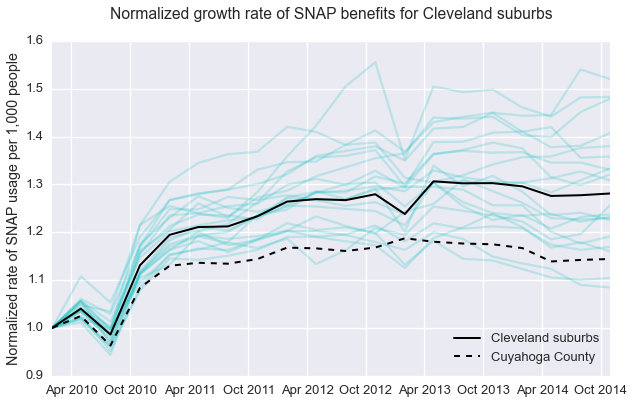

In [23]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(10,6))
for i in burbs_norm.columns:
    plt.plot(rng,burbs_norm[i],'c',alpha=0.2);

# plt.plot(rng, 20*[1],'k--', linewidth=2, alpha=0.5);
plt.plot(rng, burbs_tot/burbs_tot[0],'k-',linewidth=2,label='Cleveland suburbs');
plt.plot(rng, cuy/cuy.iloc[0], 'k--', linewidth=2,label='Cuyahoga County');
plt.legend(loc='lower right');
plt.title('Normalized growth rate of SNAP benefits for Cleveland suburbs',y=1.05);
plt.ylabel('Normalized rate of SNAP usage per 1,000 people');

In [24]:
b = burbs_norm.iloc[-1,:].T
b.sort()
print b[0:5]
print b[-5:]

Neighborhood
Lakewood             1.084403
Shaker Heights       1.104270
South Euclid         1.159977
Cleveland Heights    1.169357
Bedford Heights      1.191107
Name: 2014-10-31 00:00:00, dtype: float64
Neighborhood
Euclid              1.380026
Maple Heights       1.407537
Brooklyn            1.479286
Richmond Heights    1.482789
Fairview Park       1.520179
Name: 2014-10-31 00:00:00, dtype: float64


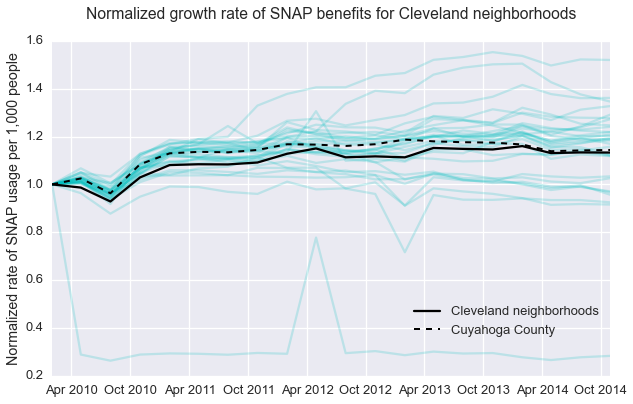

In [25]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(10,6))
for i in cle_norm.columns:
    plt.plot(rng,cle_norm[i], 'c', alpha=0.2);
# plt.plot(rng, 20*[1],'w--', linewidth=2, alpha=0.5);
plt.plot(rng,cle_tot/cle_tot[0], 'k-',label='Cleveland neighborhoods');
plt.plot(rng, cuy/cuy.iloc[0], 'k--', linewidth=2, label='Cuyahoga County');
plt.legend(loc=(0.64,0.1));
plt.title('Normalized growth rate of SNAP benefits for Cleveland neighborhoods',y=1.05);
plt.ylabel('Normalized rate of SNAP usage per 1,000 people');

In [26]:
c = cle_norm.iloc[-1,:].T
c.sort()
print c[0:6]
print c[-5:]

Neighborhood
Downtown            0.282850
Central             0.915737
University          0.924898
Tremont             0.956882
Ohio City           0.967324
Detroit Shoreway    0.970801
Name: 2014-10-31 00:00:00, dtype: float64
Neighborhood
Lee-Harvard              1.291579
Jefferson                1.327379
Fairfax                  1.346368
Buckeye-Shaker Square    1.361540
Old Brooklyn             1.520253
Name: 2014-10-31 00:00:00, dtype: float64


In [27]:
df.loc[:,df.columns.isin(b[-5:].index)].head()

Neighborhood,Brooklyn,Euclid,Fairview Park,Maple Heights,Richmond Heights
2010-01-31,110.31,197.96,51.29,231.39,91.22
2010-04-30,115.95,204.99,56.82,239.09,95.58
2010-07-31,109.05,194.71,54.02,226.21,94.35
2010-10-31,128.12,221.08,61.04,258.80,110.85
2011-01-31,132.98,232.57,64.98,275.09,114.47


In [28]:
df.loc[:,df.columns.isin(c[0:6].index)].head()

Neighborhood,Central,Detroit Shoreway,Downtown,Ohio City,Tremont,University
2010-01-31,724.04,448.99,765.53,399.38,351.36,147.00
2010-04-30,733.87,454.78,220.73,405.11,359.15,149.52
2010-07-31,682.59,420.83,201.18,385.29,341.55,141.58
2010-10-31,748.17,453.23,220.73,427.92,375.38,153.67
2011-01-31,750.84,471.79,224.41,431.12,384.61,152.84


In [29]:
def per_change2(x):
    changes = []
    for ind, val in enumerate(x):
        if ind < len(x)-1:
            if x[0] == 0:
                changes.append(x[ind]/1)
            else:
                changes.append((x[ind+1]-x[ind])/x[ind])
    return [x*100 for x in changes]

In [30]:
df_change = df_pop.apply(per_change2, axis=0)
cle_per = cle.apply(per_change2, axis=0)
burbs_per = burbs.apply(per_change2, axis=0)
cuy_per = cuy.apply(per_change2, axis=0)[0]

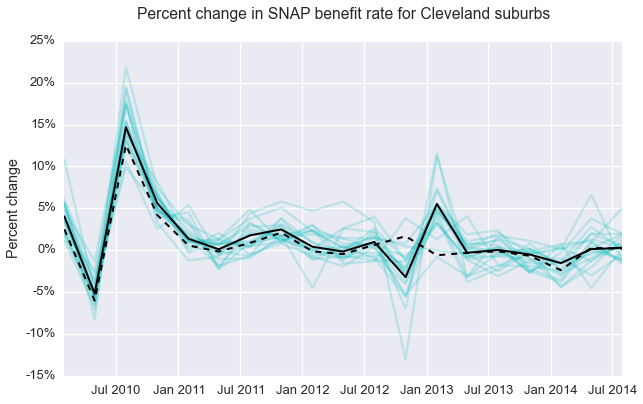

In [31]:
sns.set_style('darkgrid')
sns.set_context('talk')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
for i in burbs_per:
    plt.plot(rng[:-1],i,'c',alpha=0.2);

plt.plot(rng[:-1], per_change2(burbs_tot),'k-',linewidth=2,label='Cleveland suburbs');
plt.plot(rng[:-1], cuy_per,'k--',linewidth=2,label='Cuyahoga County');
plt.title('Percent change in SNAP benefit rate for Cleveland suburbs',y=1.05);
plt.ylabel('Percent change');
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtk.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)

# show(mpl.to_bokeh(notebook=True))

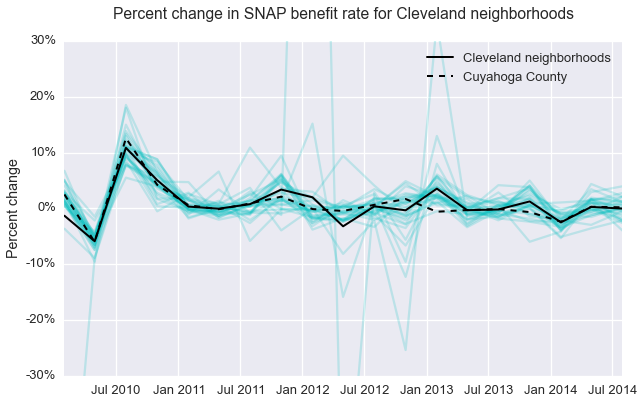

In [32]:
sns.set_style('darkgrid')
sns.set_context('talk')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
for i in cle_per:
    plt.plot(rng[:-1],i,'c',alpha=0.2);

plt.plot(rng[:-1], per_change2(cle_tot),'k-',linewidth=2,label='Cleveland neighborhoods');
plt.plot(rng[:-1], cuy_per,'k--',linewidth=2,label='Cuyahoga County');
plt.title('Percent change in SNAP benefit rate for Cleveland neighborhoods',y=1.05);
plt.ylabel('Percent change');
plt.legend()
plt.ylim(-30,30);
xticks = mtk.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)

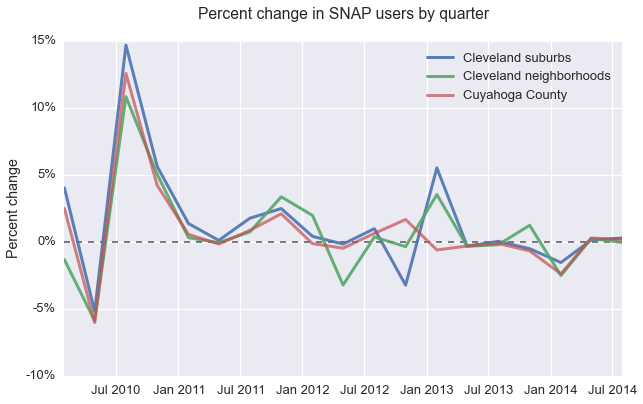

In [33]:
sns.set_context('talk')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

plt.plot(rng[:-1], 19*[0],'k--', linewidth=2, alpha=0.5);
plt.plot(rng[:-1], per_change2(burbs_tot),'-',linewidth=3, label="Cleveland suburbs",alpha=0.9);
plt.plot(rng[:-1], per_change2(cle_tot),'-',linewidth=3, label="Cleveland neighborhoods",alpha=0.9);
plt.plot(rng[:-1], cuy_per,'-',linewidth=3, label="Cuyahoga County", alpha=0.7);

plt.legend();
plt.title('Percent change in SNAP users by quarter',y=1.05);
plt.ylabel('Percent change');

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtk.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)

In [34]:
snap = pd.concat([df[list(neighborhoods)], cuy], axis=1)

In [35]:
snap_norm = snap/snap.iloc[0,:]
snap_norm = snap_norm.T
snap_norm.loc['Cleveland'] = cle_tot/cle_tot[0]
snap_norm.loc['Suburbs'] = burbs_tot/burbs_tot[0]

In [36]:
snap_norm.insert(0, 'Group','')
snap_norm.loc[~snap_norm.index.isin(cleveland_neighs),'Group'] = 'suburb'
snap_norm.loc[snap_norm.index.isin(cleveland_neighs),'Group'] = 'city'
snap_norm.loc['Cuyahoga','Group'] = 'county'
snap_norm.loc['Cleveland','Group'] = 'city_total'
snap_norm.loc['Suburbs','Group'] = 'suburbs_total'
snap_norm = snap_norm.ix[snap_norm.index != 'Downtown']

In [37]:
snap_norm.reset_index().to_csv('snap_norm.tsv', sep='\t', date_format='%Y-%m', index=False)